In [1]:
# load a coffea file
from coffea.util import load
import os
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
import matplotlib
matplotlib.rcParams["figure.dpi"] = 300

In [2]:
input_data = "/work/mmalucch/out_hh4b/SigBkg/out_2022postEE_ggFSPANetDataset_SPANETptVary0p3_1p7_Morphing_DNN_AN_1e-3_e20drop75_minDelta1em5_SPANet_only2022postEE_noEarlyStopping_20folds_DeltaProbabilityMorphing_SigBkg_DNN_ptFlatSPANet_class_weights_e5drop75_postEE_DeltaProbability/output_DATA_JetMET_JMENano_G_2022_postEE_EraG.coffea"
input_mc = "/work/mmalucch/out_hh4b/SigBkg/out_2022postEE_ggFSPANetDataset_SPANETptVary0p3_1p7_Morphing_DNN_AN_1e-3_e20drop75_minDelta1em5_SPANet_only2022postEE_noEarlyStopping_20folds_DeltaProbabilityMorphing_SigBkg_DNN_ptFlatSPANet_class_weights_e5drop75_postEE_DeltaProbability/output_GluGlutoHHto4B_spanet_kl-1p00_kt-1p00_c2-0p00_2022_postEE.coffea"


o_d = load(input_data)
sample_d=list(o_d["columns"].keys())[0]
dataset_d=list(o_d["columns"][sample_d].keys())[0]

o_m = load(input_mc)
sample_m=list(o_m["columns"].keys())[0]
dataset_m=list(o_m["columns"][sample_m].keys())[0]

category_4='4b_signal_region'
# category_4='4b_control_region'

print(f"Data: {sample_d} {dataset_d}")
print(f"MC: {sample_m} {dataset_m}")
col_d = o_d["columns"][sample_d][dataset_d][category_4]
col_m = o_m["columns"][sample_m][dataset_m][category_4]

category_2='2b_signal_region_postW'
# category_2='2b_control_region_postW'
col_d2 = o_d["columns"][sample_d][dataset_d][category_2]




Data: DATA_JetMET_JMENano_G_skimmed DATA_JetMET_JMENano_G_2022_postEE_EraG
MC: GluGlutoHHto4B_spanet_skimmed GluGlutoHHto4B_spanet_kl-1p00_kt-1p00_c2-0p00_2022_postEE


In [3]:
adp_d=col_d["events_Arctanh_Delta_pairing_probabilities"].value
adp_m=col_m["events_Arctanh_Delta_pairing_probabilities"].value
weights_m=col_m["weight"].value
adp_d2=col_d2["events_Arctanh_Delta_pairing_probabilities"].value
weights_d2=col_d2["weight"].value

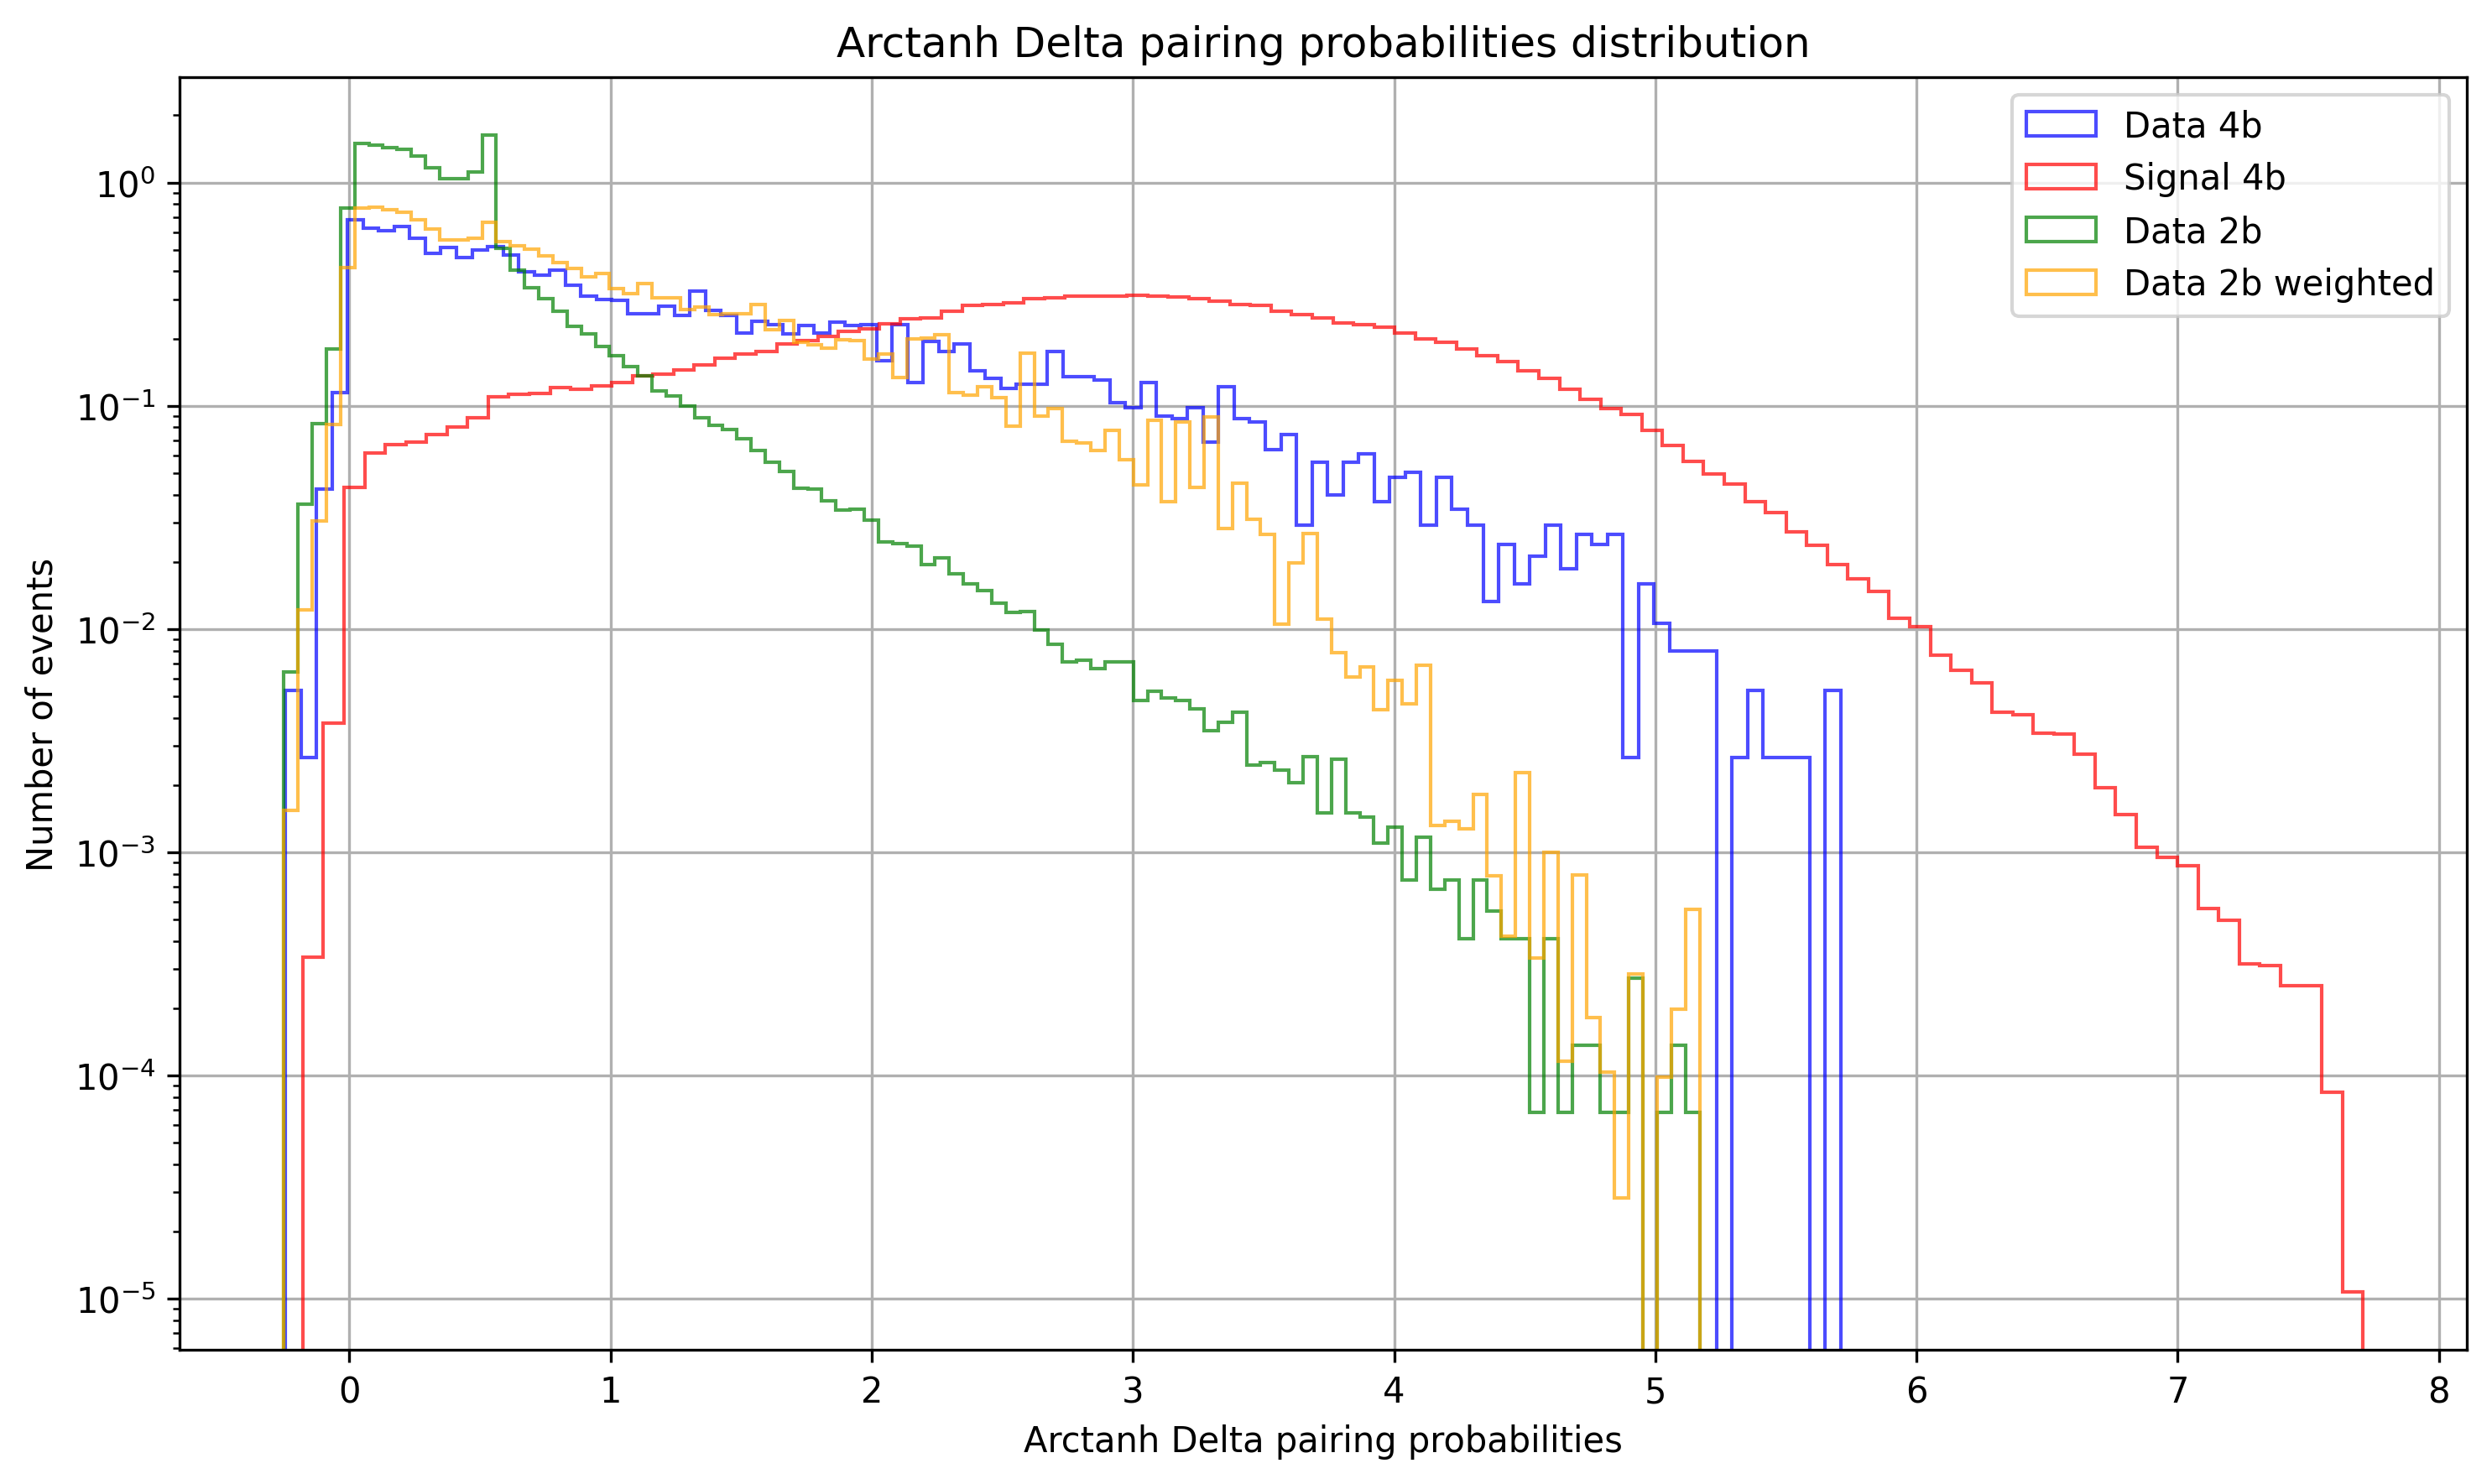

Data 2b histogram: [6.43265963e-03 3.62692511e-02 8.30086822e-02 1.79087981e-01
 7.71166397e-01 1.50195759e+00 1.47362652e+00 1.43831532e+00
 1.40683635e+00 1.31452084e+00 1.16650123e+00 1.04058534e+00
 1.03887453e+00 1.11469779e+00 1.63156884e+00 5.07495785e-01
 4.05873450e-01 3.37783063e-01 3.02950895e-01 2.64628668e-01
 2.27332929e-01 2.09951061e-01 1.84699450e-01 1.66906988e-01
 1.49114525e-01 1.36454503e-01 1.16745929e-01 1.10655432e-01
 9.98430893e-02 8.83464211e-02 8.19137614e-02 7.80815387e-02
 7.12382838e-02 6.32316755e-02 5.57725276e-02 5.06400864e-02
 4.28387758e-02 4.22228829e-02 3.73641719e-02 3.40794095e-02
 3.42847072e-02 3.06577821e-02 2.46357177e-02 2.40198248e-02
 2.35407969e-02 1.93664114e-02 2.08034950e-02 1.76555977e-02
 1.58763514e-02 1.49182957e-02 1.30706169e-02 1.18388310e-02
 1.19756961e-02 9.85428709e-03 8.55406865e-03 7.11698512e-03
 7.25385022e-03 6.63795728e-03 7.11698512e-03 7.11698512e-03
 4.79027845e-03 5.26930629e-03 4.92714354e-03 4.79027845e-03
 4.37

In [4]:
# plot the columns histograms
plt.figure(figsize=(10, 6))
plt.hist(adp_d, bins=100, histtype='step', label='Data 4b', color='blue', alpha=0.7, density=True)
plt.hist(adp_m, bins=100, weights=weights_m, histtype='step', label='Signal 4b', color='red', alpha=0.7, density=True)
plt.hist(adp_d2, bins=100, histtype='step', label='Data 2b', color='green', alpha=0.7, density=True)
plt.hist(adp_d2, bins=100, weights=weights_d2, histtype='step', label='Data 2b weighted', color='orange', alpha=0.7, density=True)
plt.xlabel('Arctanh Delta pairing probabilities')
plt.ylabel('Number of events')
plt.title('Arctanh Delta pairing probabilities distribution')
# log scale
plt.yscale('log')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


# get the histogram
hist_d, edges_d = np.histogram(adp_d, bins=100, density=True)
hist_m, edges_m = np.histogram(adp_m, bins=100, weights=weights_m, density=True)
hist_d2, edges_d2 = np.histogram(adp_d2, bins=100, density=True)
# print(f"Data 4b histogram: {hist_d} {edges_d}")
# print(f"Signal 4b histogram: {hist_m} {edges_m}")
print(f"Data 2b histogram: {hist_d2} {edges_d2}")
for i in range(len(hist_d2)):
    print(f"Data 2b histogram bin {i}: {edges_d2[i]} - {edges_d2[i+1]}: {hist_d2[i]}")




In [5]:
# for 10 values of the distribution,
# compute the s v b of mc/data of the distribution when we have 2 bins (1 above and 1 below)
N_step=100
plt.figure(figsize=(10, 6))
max_sig=0
for i in range(N_step):
    # get the values of the distribution
    val = np.linspace(-1, 10, N_step)[i]
    # get the number of events above and below the value
    n_above_d = np.sum(adp_d > val)
    n_below_d = np.sum(adp_d < val)
    n_above_m = np.sum(weights_m[adp_m > val])
    n_below_m = np.sum(weights_m[adp_m < val])

    # compute the s v b
    s = np.array([n_below_m, n_above_m])
    b = np.array([n_below_d, n_above_d])
    
    # not divide by zero
    svb_array = np.zeros(2)
    with np.errstate(divide='ignore', invalid='ignore'):
        svb_array = np.divide(s, np.sqrt(b), out=np.zeros_like(s), where=b != 0)
    # sum in quadrature
    svb = float(np.sqrt(np.sum(svb_array**2)))
    # print(svb, type(svb))

    # print(f"Value: {val:.3f} ,  S/sqrt(B): {svb:.3f}")
    if svb > max_sig:
        max_sig = svb
        max_val = val
    # plot the histogram of the distribution with the value
    # plt.hist(adp_d, bins=[-1, val, 10], histtype='step', label='Data', color='blue', alpha=0.7, density=True)
    # plt.hist(adp_m, bins=[-1, val, 10], histtype='step', label='MC', color='red', alpha=0.7, density=True)
    # plt.hist(adp_d2, bins=[-1, val, 10], histtype='step', label='Data 2b', color='green', alpha=0.7, density=True)
    # plt.xlabel('Arctanh Delta pairing probabilities')
    # plt.ylabel('Number of events')
    # plt.title('Arctanh Delta pairing probabilities distribution')
    # # log scale
    # plt.yscale('log')
    # plt.legend()
    # plt.grid()
    # plt.tight_layout()
    # plt.show()


print(f"Max S/sqrt(B): {max_sig:.3f} at value: {max_val:.3f}")

Max S/sqrt(B): 90276.059 at value: 2.444


<Figure size 3000x1800 with 0 Axes>

In [6]:

def compute_significance(s, b):
    """Compute S/sqrt(B), but return 0 where B == 0."""
    significance = np.zeros_like(s)
    nonzero = b > 0
    significance[nonzero] = s[nonzero] / np.sqrt(b[nonzero])
    return significance

def total_significance(bin_edges, sig_vals, sig_weights, bkg_vals):
    sig_hist, _ = np.histogram(sig_vals, bins=bin_edges, weights=sig_weights)
    bkg_hist, _ = np.histogram(bkg_vals, bins=bin_edges)
    return np.sqrt(np.sum(compute_significance(sig_hist, bkg_hist)**2))

def optimize_bin_edges(n_bins, adp_m, weights_m, adp_d, n_scan=100):
    """
    Optimize bin edges to maximize sum of S/sqrt(B), with significance=0 if B=0.

    Parameters:
    - n_bins: Number of desired bins
    - adp_m: Signal variable values
    - weights_m: Signal weights
    - adp_d: Background variable values (unweighted)
    - n_scan: Number of candidate splits to test in each bin

    Returns:
    - np.ndarray of optimal bin edges
    """
    min_val = min(np.min(adp_m), np.min(adp_d))
    max_val = max(np.max(adp_m), np.max(adp_d))
    
    min_val=-1
    max_val=10
    initial_edges = [min_val, max_val]

    for _ in range(n_bins - 1):  # Already 1 bin, need n_bins - 1 new edges
        best_score = -np.inf
        best_edge = None
        current_edges = np.sort(initial_edges)

        candidate_edges = []
        for i in range(len(current_edges) - 1):
            left, right = current_edges[i], current_edges[i + 1]
            scan_points = np.linspace(left, right, n_scan + 2)[1:-1]  # exclude edges
            candidate_edges.extend(scan_points)

        for edge in candidate_edges:
            new_edges = np.sort(initial_edges + [edge])
            score = total_significance(new_edges, adp_m, weights_m, adp_d)
            if score > best_score:
                best_score = score
                best_edge = edge

        if best_edge is not None:
            initial_edges.append(best_edge)
        else:
            break

    return np.sort(initial_edges), best_score


In [7]:
if False:
    edges, best_score = optimize_bin_edges(2, adp_m, weights_m, adp_d, n_scan=1000)
    print("Optimal bin edges:", edges, "with score:", best_score)

    edges, best_score = optimize_bin_edges(2, adp_m, np.ones_like(adp_m), adp_d, n_scan=1000)
    print("Optimal bin edges:", edges, "with score:", best_score)




Optimal bin edges: [-1.          2.43956044 10.        ] with score: 90363.86875602813


KeyboardInterrupt: 

In [ ]:
print(weights_m)

[10.3087024 10.3087024 10.3087024 ... 10.3087024 10.3087024 10.3087024]


# compare prob diff between two models

In [8]:

def plot_distribution(adp_d, adp_m, adp_d2, title, category_4, category_2, bins, tanh=False):    
    
    if tanh:
        adp_d = np.tanh(adp_d)
        adp_m = np.tanh(adp_m)
        adp_d2 = np.tanh(adp_d2)
        
    
    # plot the columns histograms
    # plot aloso the ratio 
    fig, (ax, ax_ratio) = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
    ax.hist(adp_d, bins=bins, histtype='step', label=f'Data {category_4}', color='blue', alpha=0.7, density=True)
    ax.hist(adp_m, bins=bins, histtype='step', label=f'HH4b {category_4}', color='red', alpha=0.7, density=True)
    ax.hist(adp_d2, bins=bins, histtype='step', label=f'Data {category_2}', color='green', alpha=0.7, density=True)
    ax.set_title(f'Arctanh Delta pairing probabilities distribution for {title}')
    # ax.set_xlabel('Arctanh Delta pairing probabilities')
    ax.set_ylabel('Number of events')
    # log scale
    ax.legend()
    ax.set_yscale('log')
    plt.grid()
    plt.tight_layout()
    
    # plot the ratio d and d2
    # get the histogram
    hist_d, edges_d = np.histogram(adp_d, bins=bins, density=True)
    hist_m, edges_m = np.histogram(adp_m, bins=bins, density=True)
    hist_d2, edges_d2 = np.histogram(adp_d2, bins=bins, density=True)
    # compute the bin centers
    bin_centers_d = 0.5 * (edges_d[:-1] + edges_d[1:])
    ratio_d = hist_d / hist_m
    ratio_d2 = hist_d / hist_d2
    
    # plot the ratio
    # ax_ratio.plot(bin_centers_d, ratio_d, label='Data 4b / Signal 4b', color='blue')
    ax_ratio.plot(bin_centers_d, ratio_d2, label='Data 4b / Data 2b', color='green')
    ax_ratio.set_xlabel('Arctanh Delta pairing probabilities')
    ax_ratio.set_ylabel('Ratio')
    ax_ratio.axhline(1, color='black', linestyle='--', label='Ratio = 1')
    ax_ratio.legend()
    ax_ratio.grid()
    ax_ratio.legend()
    plt.tight_layout()
    plt.show()
    
    

def get_cols(input_data, input_mc, category_4, category_2):
    o_d = load(input_data)
    sample_d=list(o_d["columns"].keys())[0]
    dataset_d=list(o_d["columns"][sample_d].keys())[0]
    
    o_m = load(input_mc)
    sample_m=list(o_m["columns"].keys())[0]
    dataset_m=list(o_m["columns"][sample_m].keys())[0]


    print(f"Data: {sample_d} {dataset_d}")
    print(f"MC: {sample_m} {dataset_m}")
    col_d = o_d["columns"][sample_d][dataset_d][category_4]
    col_m = o_m["columns"][sample_m][dataset_m][category_4]

    
    col_d2 = o_d["columns"][sample_d][dataset_d][category_2]
    
    adp_d=col_d["events_Arctanh_Delta_pairing_probabilities"].value
    adp_m=col_m["events_Arctanh_Delta_pairing_probabilities"].value
    adp_d2=col_d2["events_Arctanh_Delta_pairing_probabilities"].value
    
    

    return adp_d, adp_m, adp_d2



Data: DATA_JetMET_JMENano_G_skimmed DATA_JetMET_JMENano_G_2022_postEE_EraG
MC: GluGlutoHHto4B_spanet_skimmed GluGlutoHHto4B_spanet_kl-1p00_kt-1p00_c2-0p00_2022_postEE


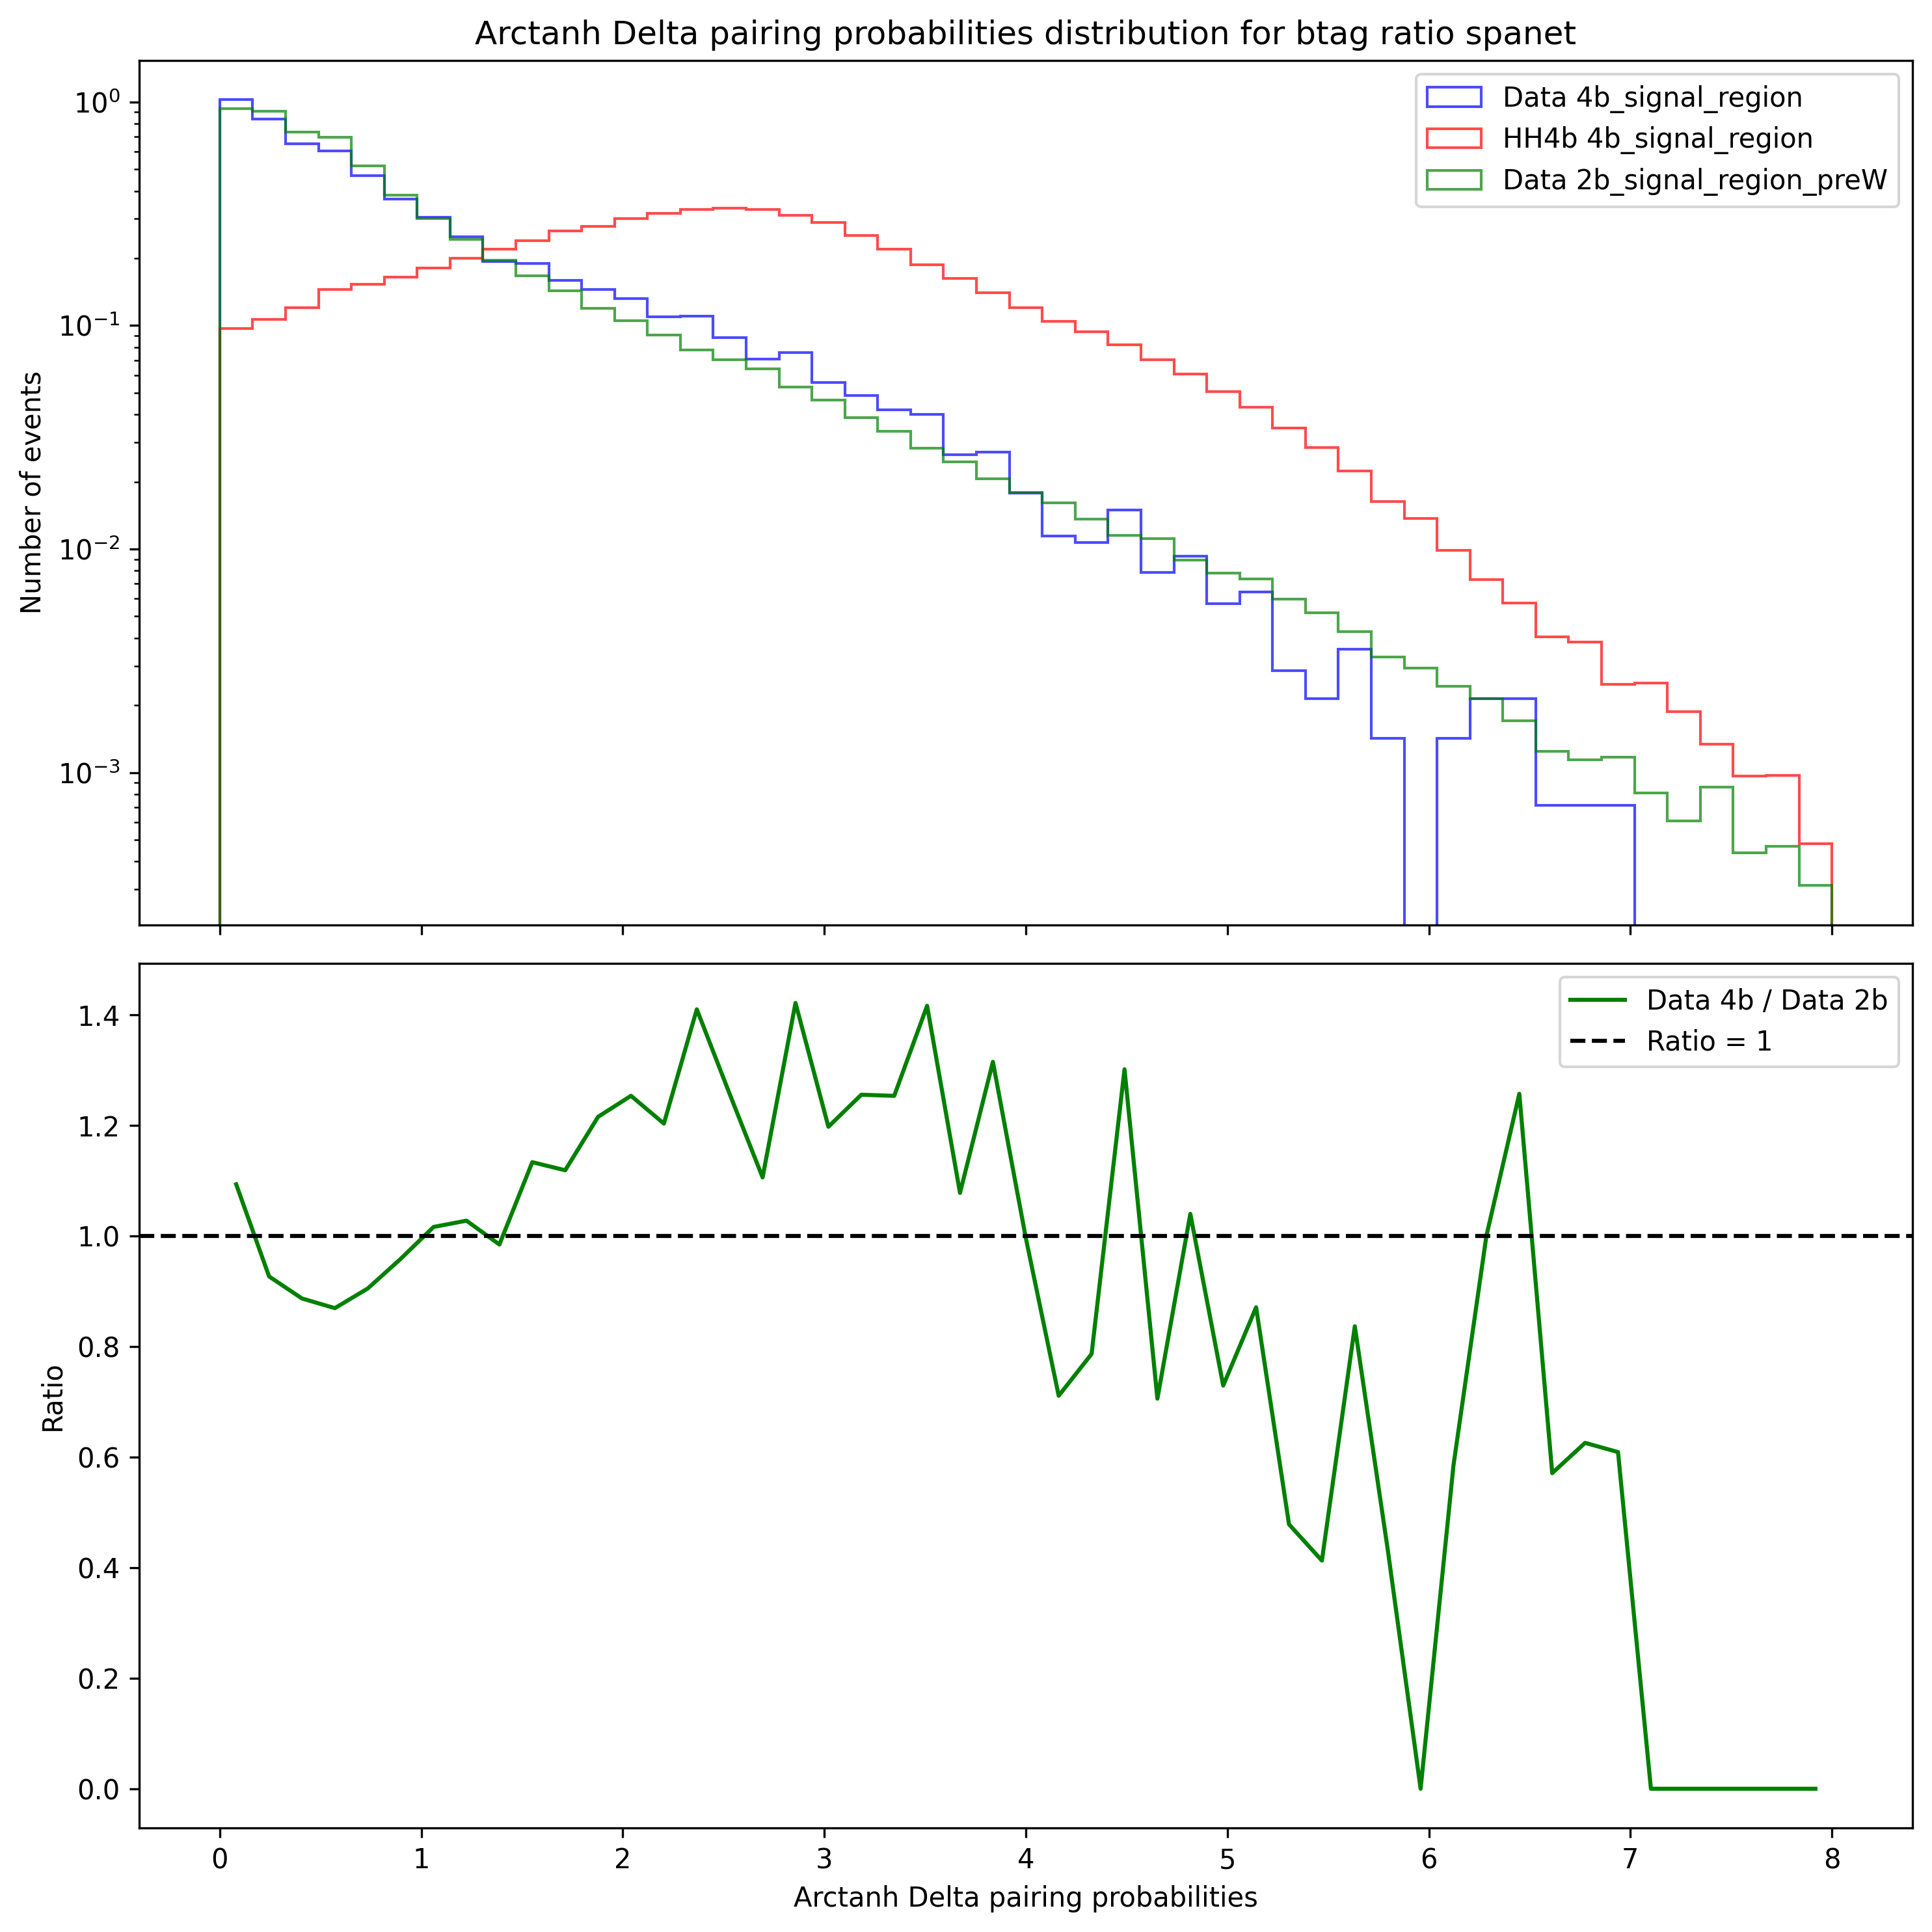

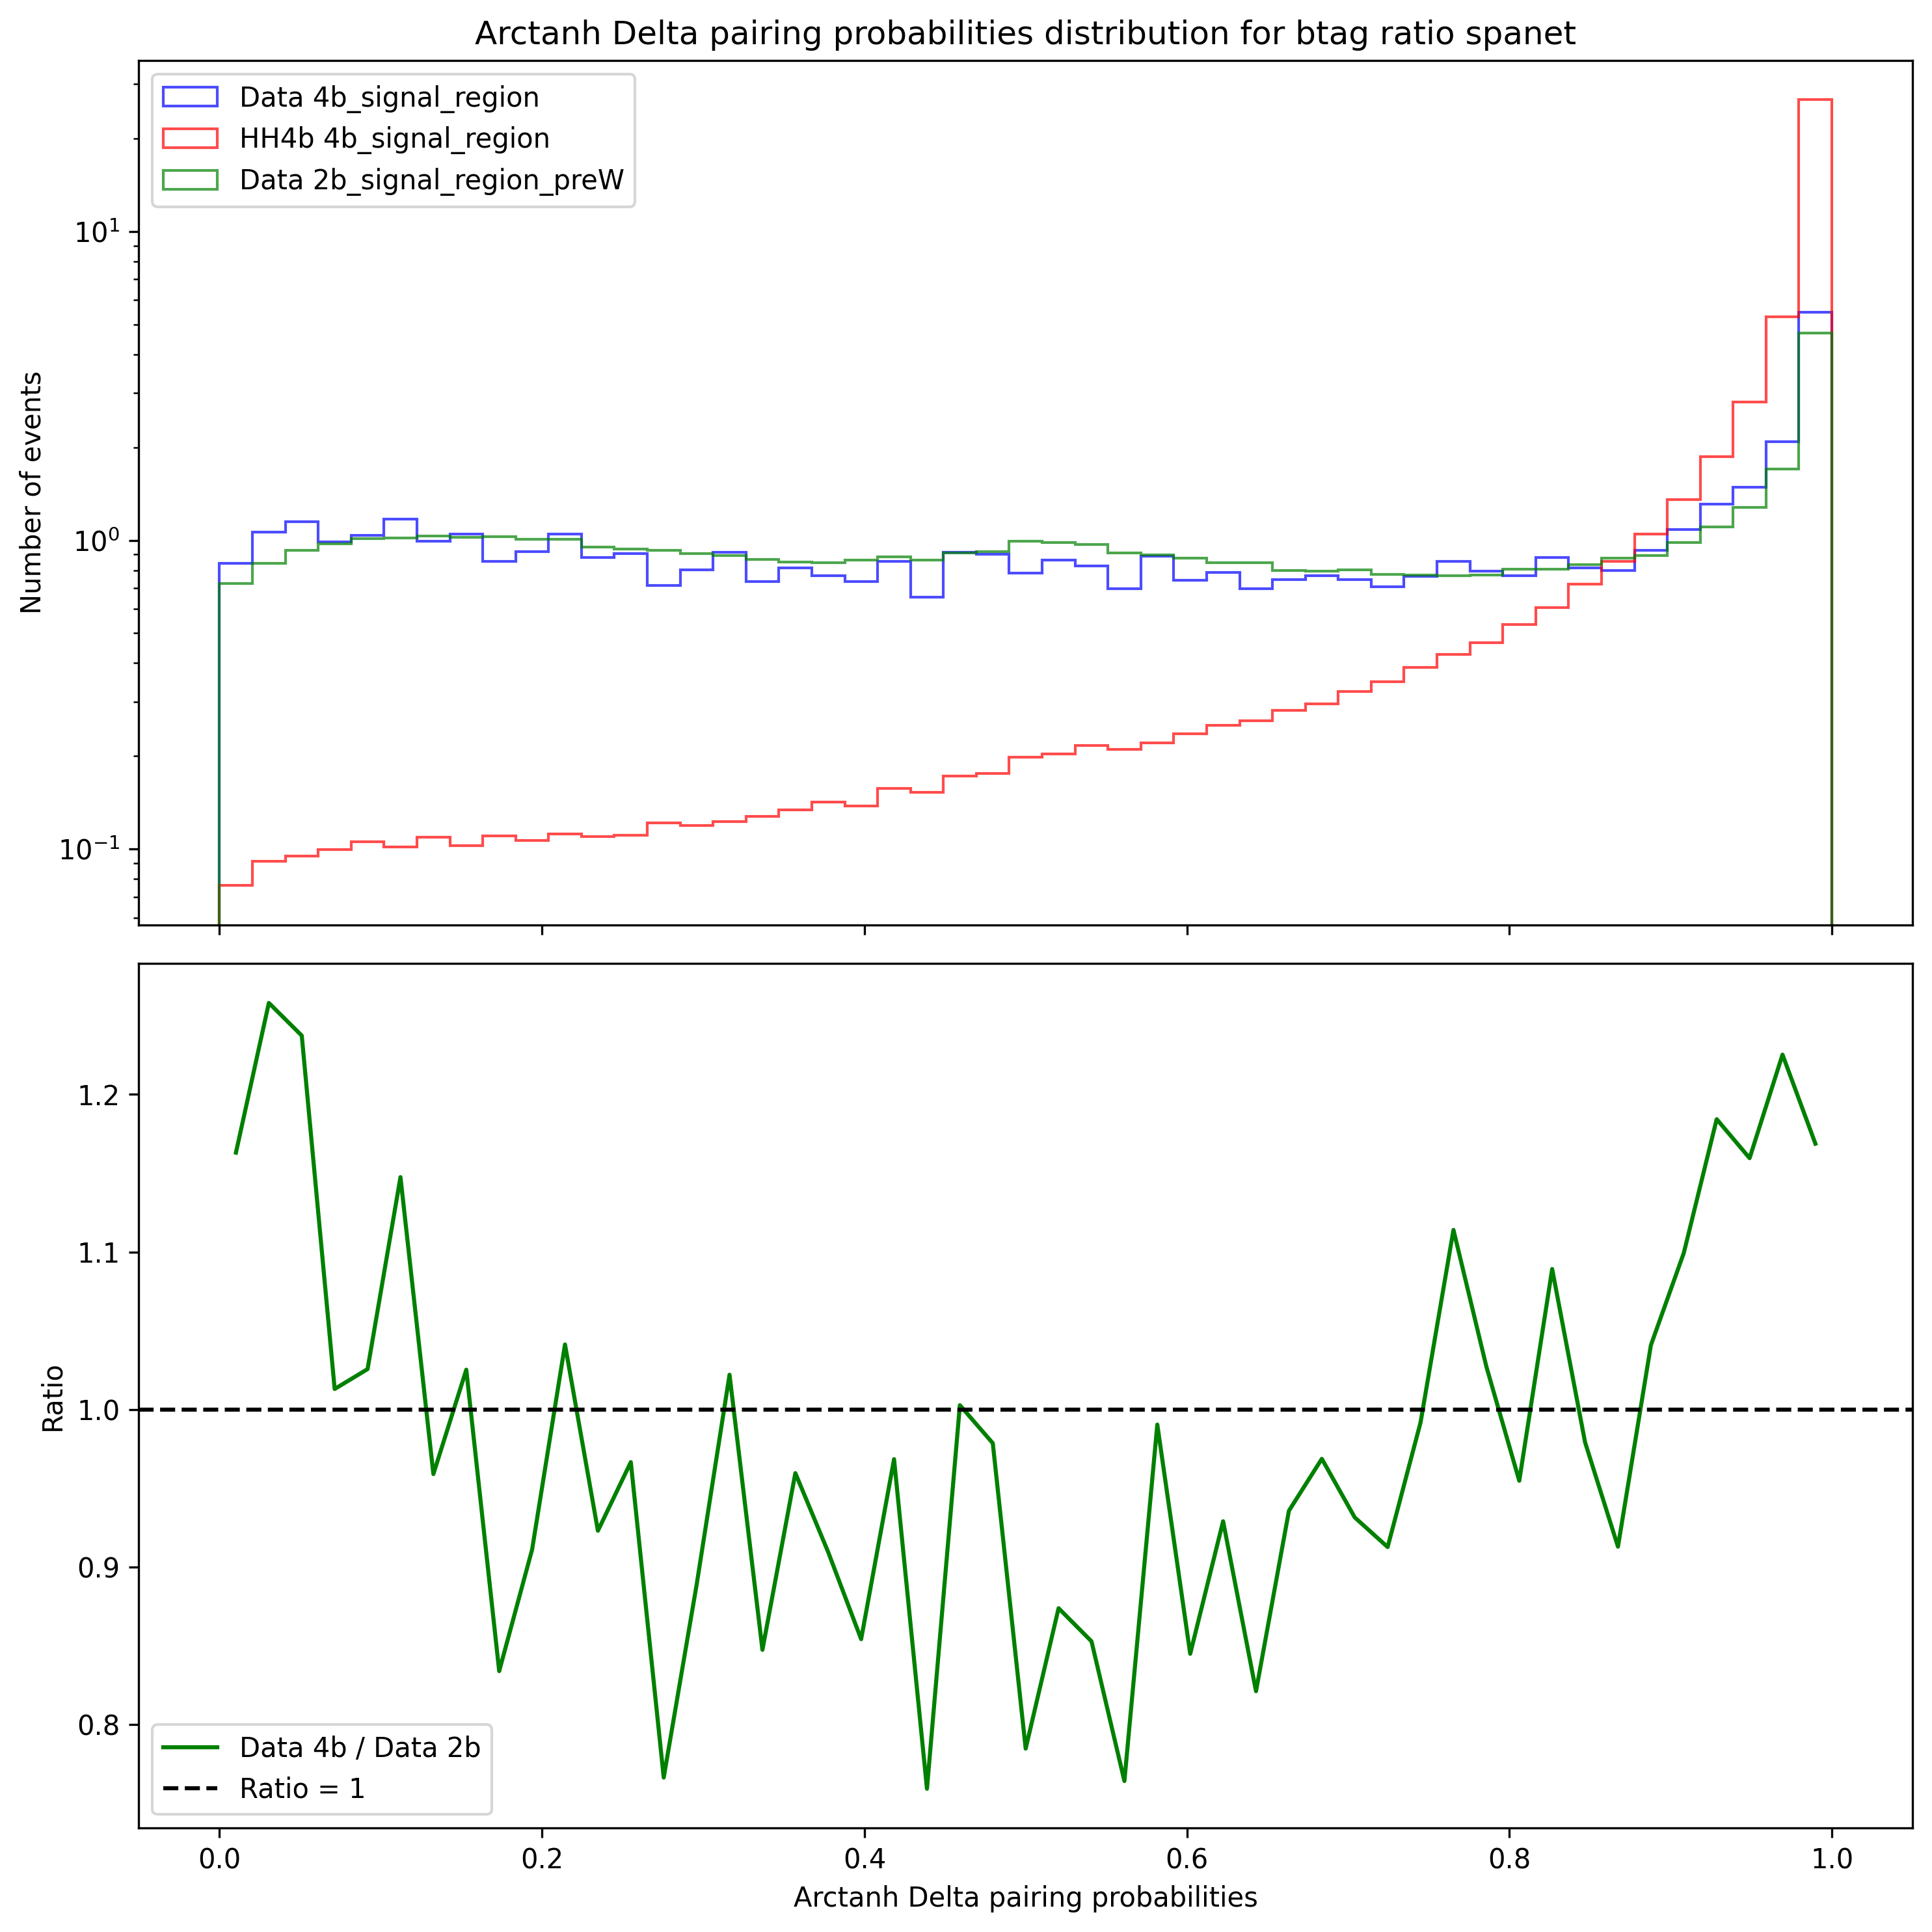

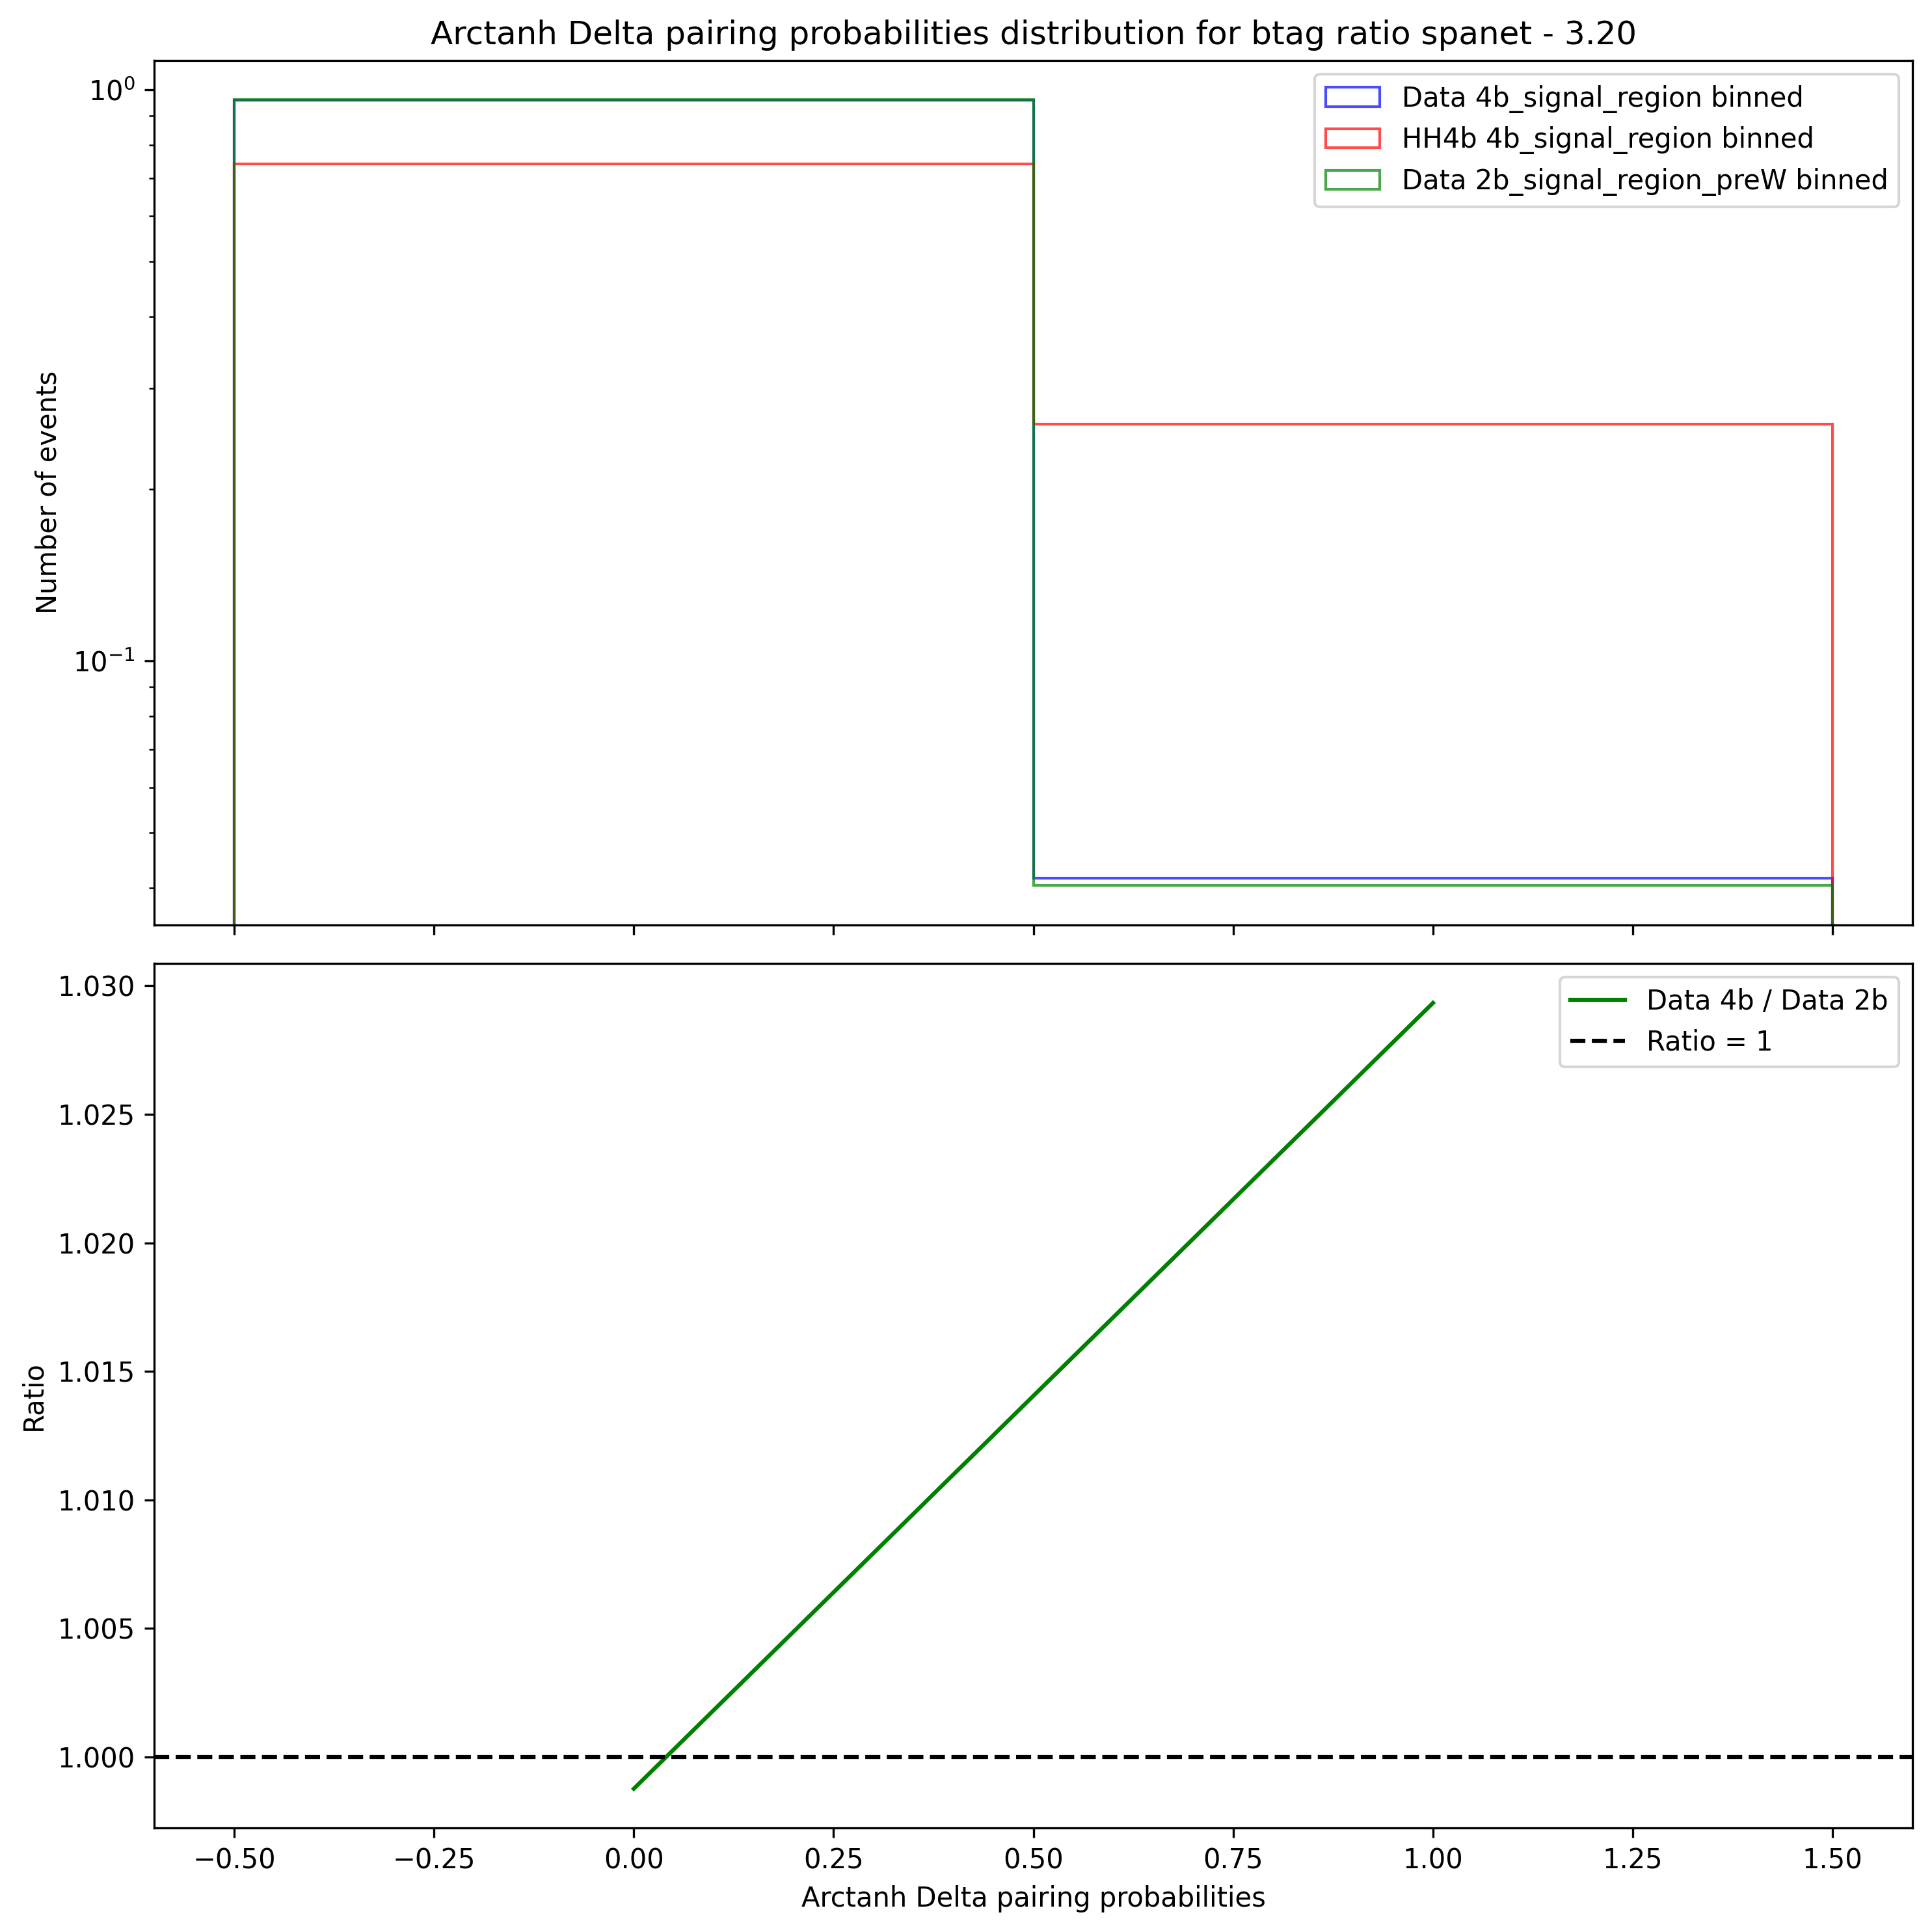

Data: DATA_JetMET_JMENano_G_skimmed DATA_JetMET_JMENano_G_2022_postEE_EraG
MC: GluGlutoHHto4B_spanet_skimmed GluGlutoHHto4B_spanet_kl-1p00_kt-1p00_c2-0p00_2022_postEE


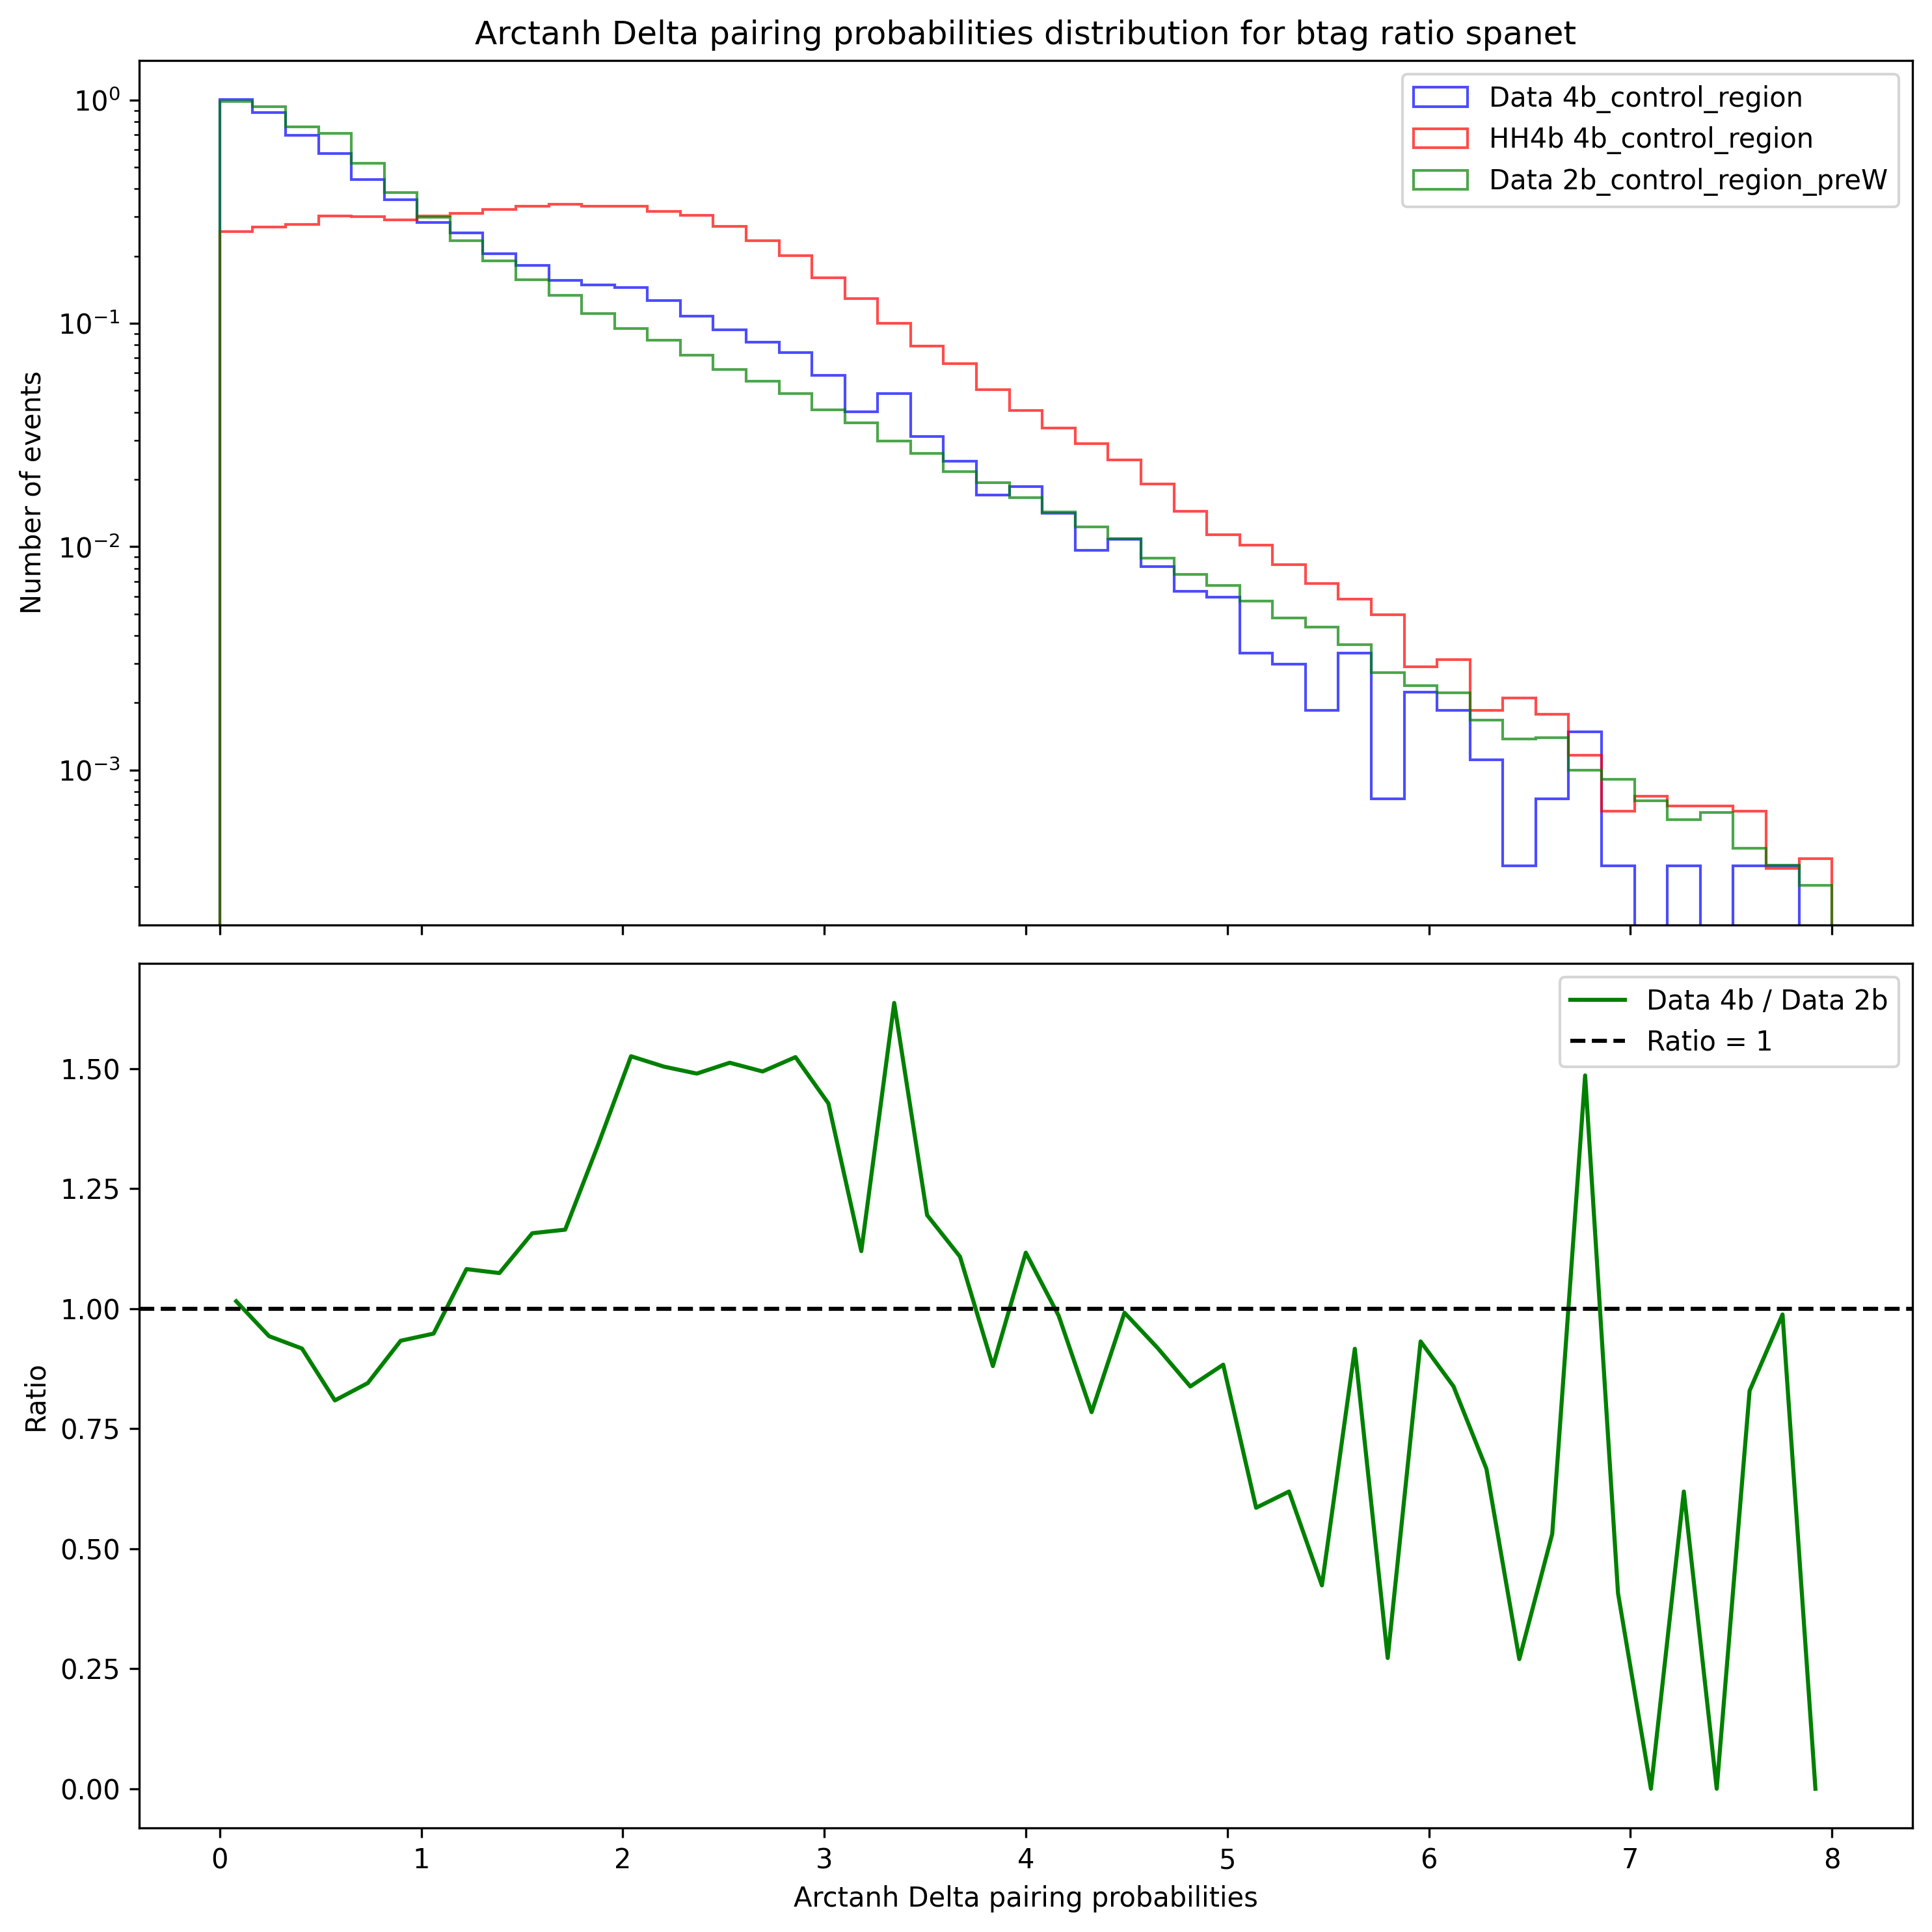

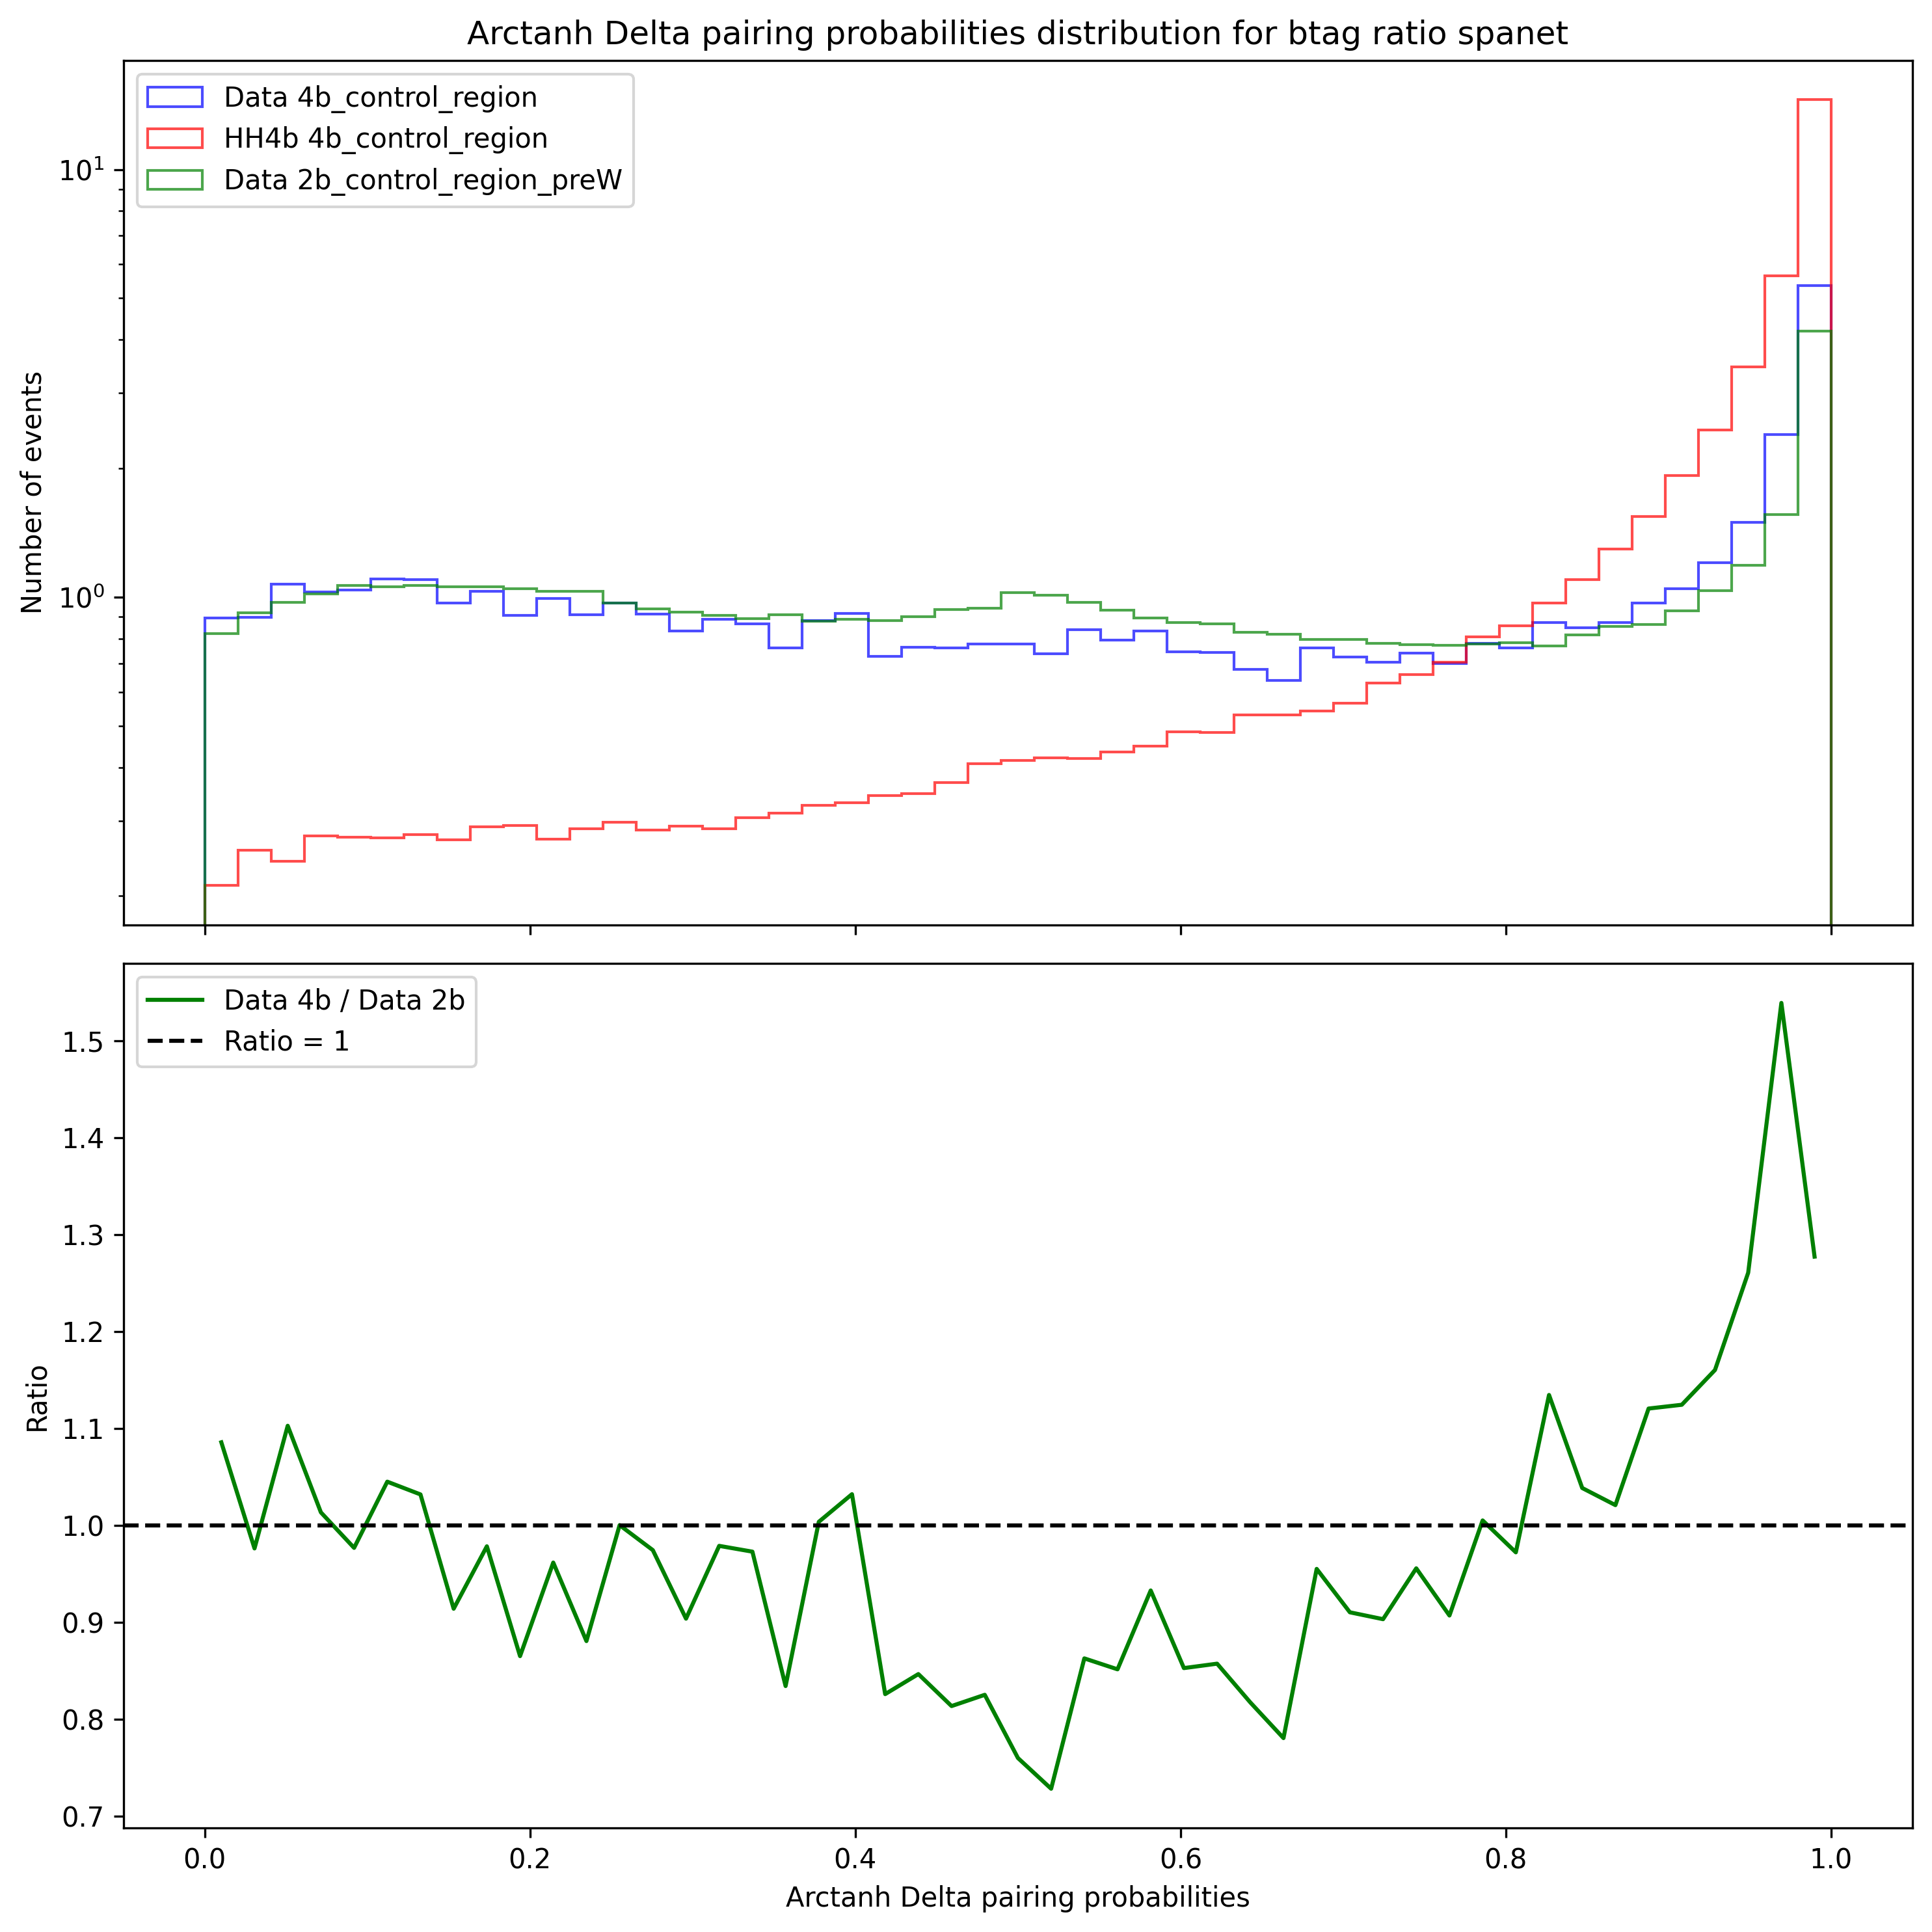

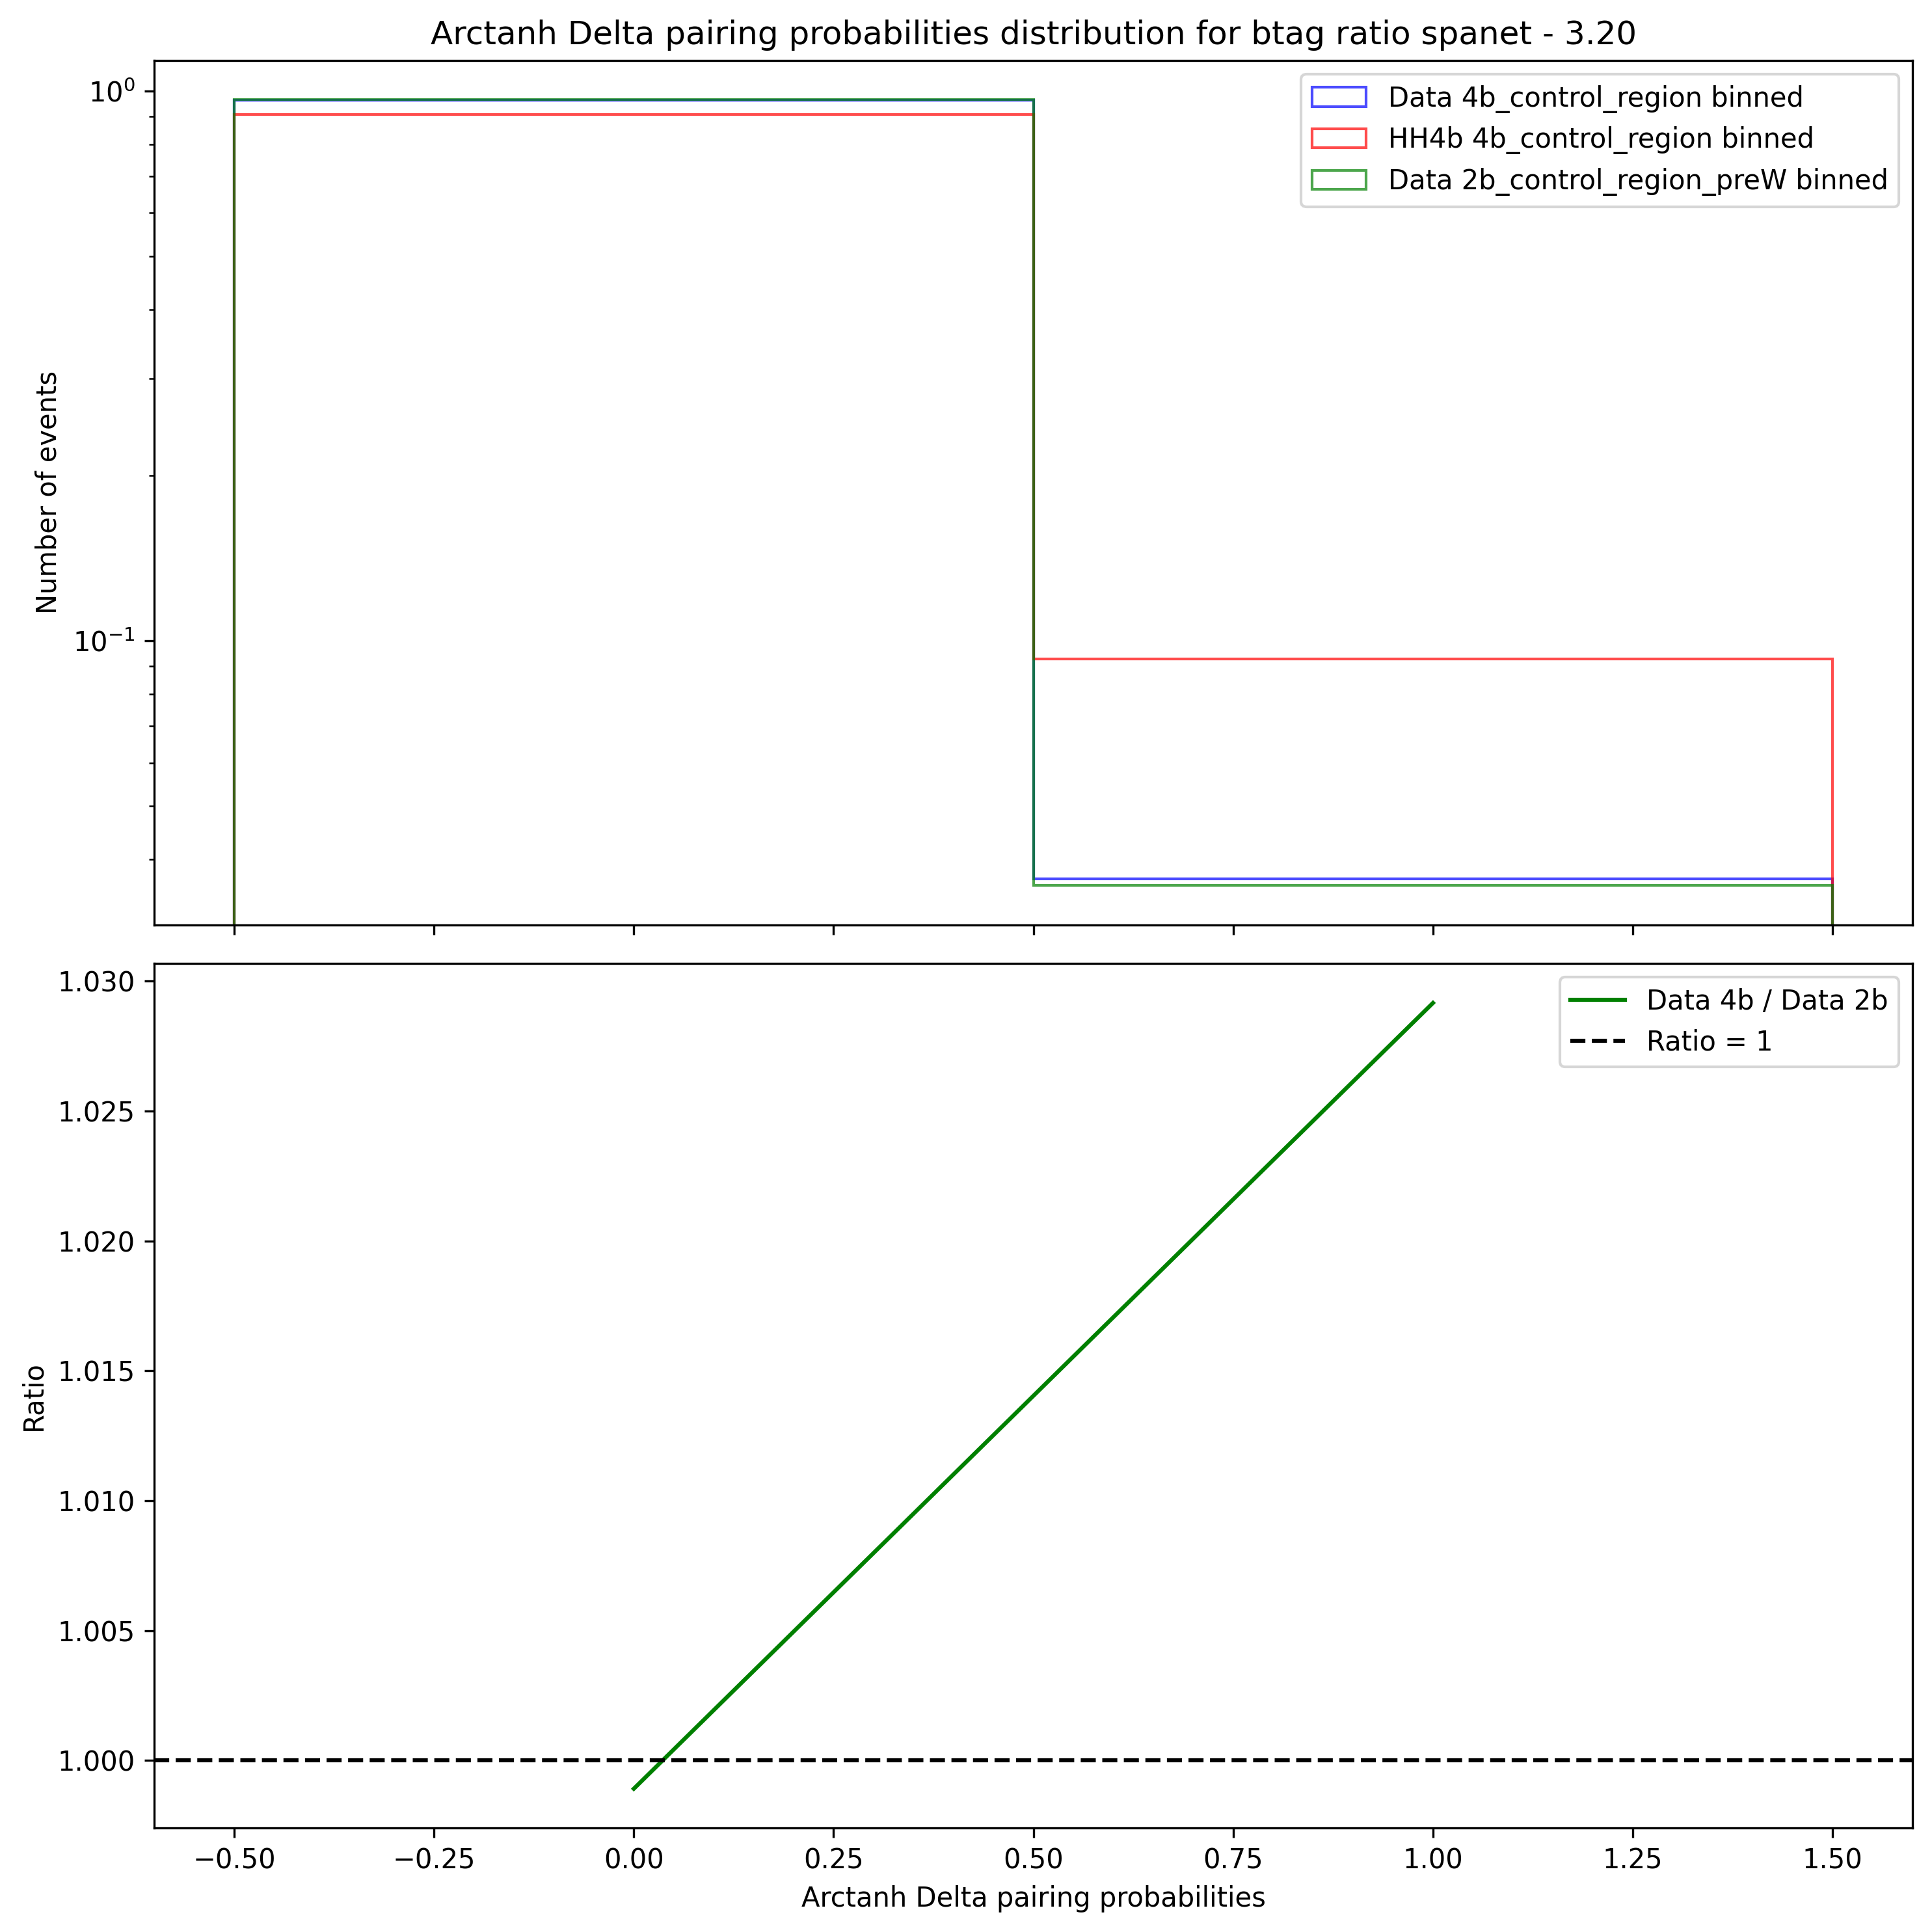

In [9]:
for input_data, input_mc, title in zip(
    [
        # "/work/mmalucch/out_hh4b/SigBkg/out_2022postEE_ggFSPANetDataset_SPANETptVary0p3_1p7_Morphing_DNN_AN_1e-3_e20drop75_minDelta1em5_SPANet_only2022postEE_noEarlyStopping_20folds_DeltaProbabilityMorphing_SigBkg_DNN_ptFlatSPANet_class_weights_e5drop75_postEE_DeltaProbability/output_DATA_JetMET_JMENano_G_2022_postEE_EraG.coffea",
        "/work/mmalucch/out_hh4b/btag_ratio/out_2022postEE_spanet_pt_vary_bratio_all/output_DATA_JetMET_JMENano_G_2022_postEE_EraG.coffea",
    ],
    [
        # "/work/mmalucch/out_hh4b/SigBkg/out_2022postEE_ggFSPANetDataset_SPANETptVary0p3_1p7_Morphing_DNN_AN_1e-3_e20drop75_minDelta1em5_SPANet_only2022postEE_noEarlyStopping_20folds_DeltaProbabilityMorphing_SigBkg_DNN_ptFlatSPANet_class_weights_e5drop75_postEE_DeltaProbability/output_GluGlutoHHto4B_spanet_kl-1p00_kt-1p00_c2-0p00_2022_postEE.coffea",
        "/work/mmalucch/out_hh4b/btag_ratio/out_2022postEE_spanet_pt_vary_bratio_all/output_GluGlutoHHto4B_spanet_kl-1p00_kt-1p00_c2-0p00_2022_postEE.coffea",
    ],
    [
        # "pt flat spanet", 
        "btag ratio spanet"
        ],
):
    for edge in np.linspace(3.2, 3.2, 1):
        for region in ["signal", "control"]:
            category_4 = f"4b_{region}_region"
            category_2 = f"2b_{region}_region_preW"
            
            adp_d, adp_m, adp_d2 = get_cols(input_data, input_mc, category_4, category_2)
            plot_distribution(adp_d, adp_m, adp_d2, title, category_4, category_2,np.linspace(0, 8, 50))
            plot_distribution(adp_d, adp_m, adp_d2, title, category_4, category_2,np.linspace(0, 1, 50), tanh=True)
            
            arctanh_delta_prob_bin_edges=[-0.2, edge, 20]
            bin_adp_d=np.digitize(adp_d, arctanh_delta_prob_bin_edges)-1
            bin_adp_m=np.digitize(adp_m, arctanh_delta_prob_bin_edges)-1
            bin_adp_d2=np.digitize(adp_d2, arctanh_delta_prob_bin_edges)-1
            plot_distribution(
                bin_adp_d, bin_adp_m, bin_adp_d2, f"{title} - {edge:.2f}", category_4 + " binned", category_2 + " binned", [-0.5, 0.5, 1.5]
            )
        

In [ ]:
# do the same scan of above but for 3 bins, so scan where to put the bin maximising the significance
N_step=100
edges, best_score = optimize_bin_edges(3, adp_m, weights_m, adp_d, n_scan=N_step)
